The goal of this competition is to use seismic signals to predict the timing of laboratory earthquakes. The data comes from a well-known experimental set-up used to study earthquake physics. The acoustic_data input signal is used to predict the time remaining before the next laboratory earthquake (time_to_failure).

The training data is a single, continuous segment of experimental data. The test data consists of a folder containing many small segments. The data within each test file is continuous, but the test files do not represent a continuous segment of the experiment; thus, the predictions cannot be assumed to follow the same regular pattern seen in the training file.

For each seg_id in the test folder, you should predict a single time_to_failure corresponding to the time between the last row of the segment and the next laboratory earthquake.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.pylab import rcParams
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 10, 4

In [3]:
pd.set_option("display.precision", 20)

In [ ]:
%%time
# load all data
train = pd.read_csv('D:\OneDrive - Georgia State University\Data Science\Kaggle\LANL - Earthquake - Prediction\data\\train.csv')

In [ ]:
train.head(50)

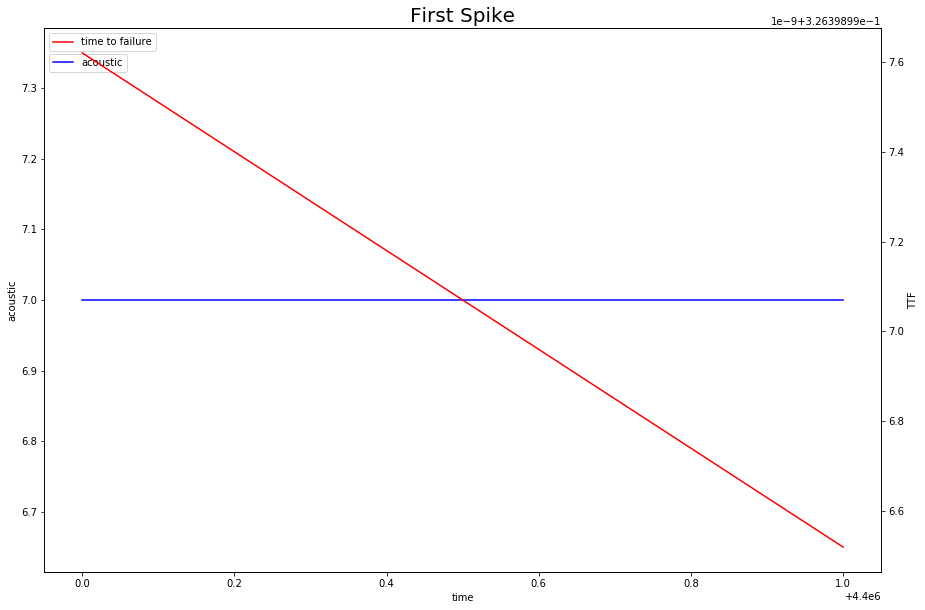

In [6]:
fig, ax1 = plt.subplots(figsize=(15,10))
plt.title('First Spike', size=20)

ax1.set_xlabel('time')
ax1.set_ylabel('acoustic')
ax1.plot(train.acoustic_data[4400000:4400002], color='b', label = 'acoustic')
plt.legend(loc=(.006,.92))

ax2 = ax1.twinx()
ax2.set_ylabel('TTF')
ax2.plot(train.time_to_failure[4400000:4400002], color='r', label = 'time to failure')
plt.legend(loc=2);

In [7]:
train.shape

(629145480, 2)

Unique acoustic data (will be useful if using classification approach)

**Statistical information**

Let's look at some plots of our target variable

In [8]:
def pairplot(data):
    #partial_data = data[start : end]
    #simple_data = partial_data

    # Time vs Temperature vs Load pairplot
    sns.set(rc={'figure.figsize':(20, 20)},style="ticks", color_codes=True)
    
    sns_plot = sns.pairplot(data)
    #sns_plot.savefig(data_dir + "_pairplot.png")

        
#pairplot(train)

This normal distribution of time to failure minimums seems interesting. Could dive into it later. If using regression techniques, a normally distributed target varible could prove to very useful.

Trying to do EDA on the entire dataset is proving to be too computationally intensive, and for any aggregate operations it's going to take even longer. For the next part, I am going to explore just the first cycle of time to failure.

MemoryError: 

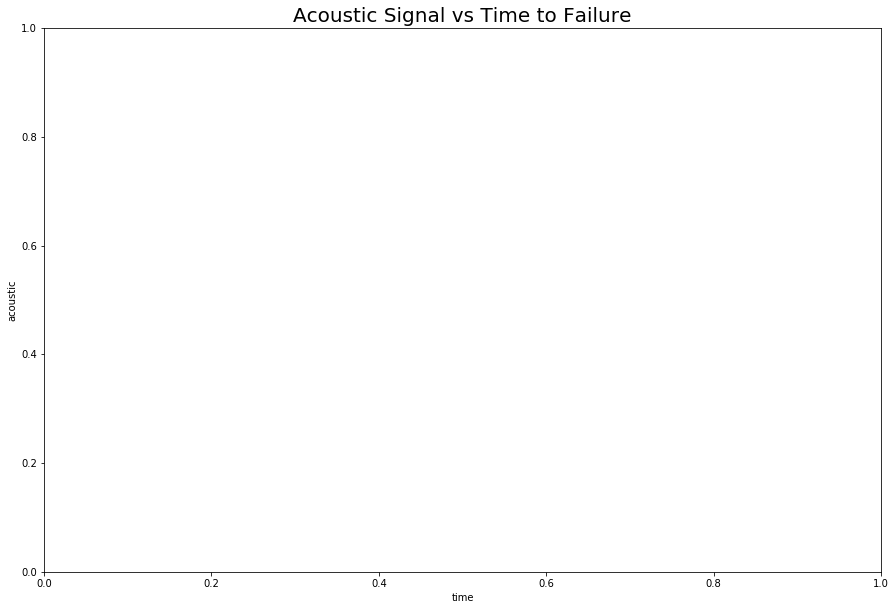

In [10]:
fig, ax1 = plt.subplots(figsize=(15,10))
plt.title('Acoustic Signal vs Time to Failure', size=20)

ax1.set_xlabel('time')
ax1.set_ylabel('acoustic')
ax1.plot(train.acoustic_data, color='b', label = 'acoustic')
plt.legend(loc=(.006,.92))

ax2 = ax1.twinx()
ax2.set_ylabel('TTF')
ax2.plot(train.time_to_failure, color='r', label = 'time to failure')
plt.legend(loc=2);


It looks like 9% of the training data seems to be a reasonable amount to study 1 cycle. Let's proceed with this eda dataset. Some initial notes:
> * The acoustic data seems to have spikes that don't correspond to the linear trends in the time to failure data. 
* The very big spike intervals in acoustic data do correspond to the change in direction of time to failure


Because 'time to failure' is graphed as steps, I wanted to see if there is a significant information associated with that.

    1) See how many data are there in one step.

In [11]:
train.head()

,acoustic_data,time_to_failure
0,12,1.46909998320000001470
1,6,1.46909998210000014573
2,8,1.46909998099999983268
3,5,1.46909997990000018575
4,8,1.46909997879999987269


In [12]:
train['ttf_diff'] = train['time_to_failure'].diff()

In [22]:
train.head()

,acoustic_data,time_to_failure,ttf_diff
0,12,1.46909998320000001470,NaN
1,6,1.46909998210000014573,-0.00000000109999986897
2,8,1.46909998099999983268,-0.00000000110000031306
3,5,1.46909997990000018575,-0.00000000109999964693
4,8,1.46909997879999987269,-0.00000000110000031306


In [23]:
maxima = train[train.ttf_diff > 0].index
minima = train[train.ttf_diff > 0].index - 1
max_min = maxima.append(minima)

MemoryError: 

In [ ]:
max_min = max_min.insert(0, 0)

In [ ]:
max_min_df = train.iloc[max_min].sort_index()

In [ ]:
max_min_df

In [ ]:
max_min_df.index

In [ ]:
def subset(data, index_list, cycle_number):
    start = max_min_df.index[::2] 
    end = max_min_df.index[1::2] 
    
    
    subset = train[start[cycle_number] : end[cycle_number+1]+2]
    return subset

In [ ]:
sub_data = subset(train, max_min_df.index, 0)

In [ ]:
pairplot(sub_data)

In [ ]:
sub_data

In [ ]:
sub_data.describe()

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,10))
plt.title('Acoustic Signal vs Time to Failure', size=20)

ax1.set_xlabel('time')
ax1.set_ylabel('acoustic')
ax1.plot(sub_data.acoustic_data, color='b', label = 'acoustic')
plt.legend(loc=(.006,.92))

ax2 = ax1.twinx()
ax2.set_ylabel('TTF')
ax2.plot(sub_data.time_to_failure, color='r', label = 'time to failure')
plt.legend(loc=2);

In [ ]:
# categorical - spike or no spike
# accumulative sums
# log

